# <center> <font color='purple'>  🏠 Housing Price Prediction - Linear Regression

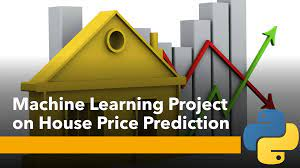

***

# Housing Price Prediction Case Study

## <b> <font color="#1E90FF"> Problem Statement : 

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

* To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.


* To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.


* To know the accuracy of the model, i.e. how well these variables can predict house prices.

This is my first attempt on a simple linear regression model to predict housing prices. Still working on improving the accuracy of the model though. This is very simple code with not much functionality.

## <b> <font color="#1E90FF"> Data :

Use housing dataset.

***

# Table of Contents :

<a href="#-1.-Importing-Libraries-" style="text-decoration: none;"> 1. <b> <font color="#1E90FF"> Importing Libraries </font>

<a href="#-2.-Importing-the-dataset-" style="text-decoration: none;"> 2. <b> <font color="#1E90FF"> Importing the dataset </font>
    
 <a href="#-3.-Explore-the-data-" style="text-decoration: none;"> 3. <b> <font color="#1E90FF"> Explore the data </font>
     
<a href="#-4.-Removing-Outliers-with-Z-score--" style="text-decoration: none;"> 4. <b> <font color="#1E90FF"> Removing Outliers with Z-score  </font>
    
<a href="#-5.-Training-and-Testing-the-dataset--" style="text-decoration: none;"> 5. <b> <font color="#1E90FF"> Training and Testing the dataset  </font>
    
<a href="#-6.-Target-Encoding--" style="text-decoration: none;"> 6. <b> <font color="#1E90FF"> Target Encoding  </font>

***

#  <font color='blue'> 1. Importing Libraries </font> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="chapter2"></a>

# <font color='blue'> 2. Importing the dataset </font>  

In [2]:
dataset = pd.read_csv(r'C:\Users\userkk\Downloads\Housing Price Prediction/data.csv')

In [3]:
dataset.head() #checking the dataframe structure

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
dataset.info() #checking data types and null vlues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<a class="anchor" id="chapter3"></a>

# <font color='blue'> 3. Explore the data </font>

* Our data has 18 features. A lot work with all at once.

* Let's plot some graph to get the idea which features dominate our target.

In [6]:
plt.style.use('dark_background')

<AxesSubplot:xlabel='Logprice', ylabel='Density'>

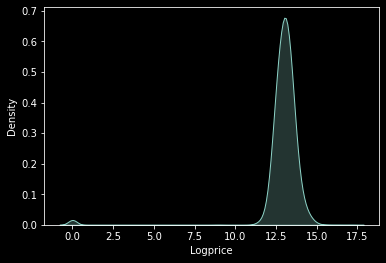

In [7]:
# let's check the distribution of our target column

dataset['Logprice'] = dataset.price.apply(np.log1p)
sns.kdeplot(dataset.Logprice,shade=True)

In [8]:
dataset.drop('Logprice',axis=1,inplace=True)

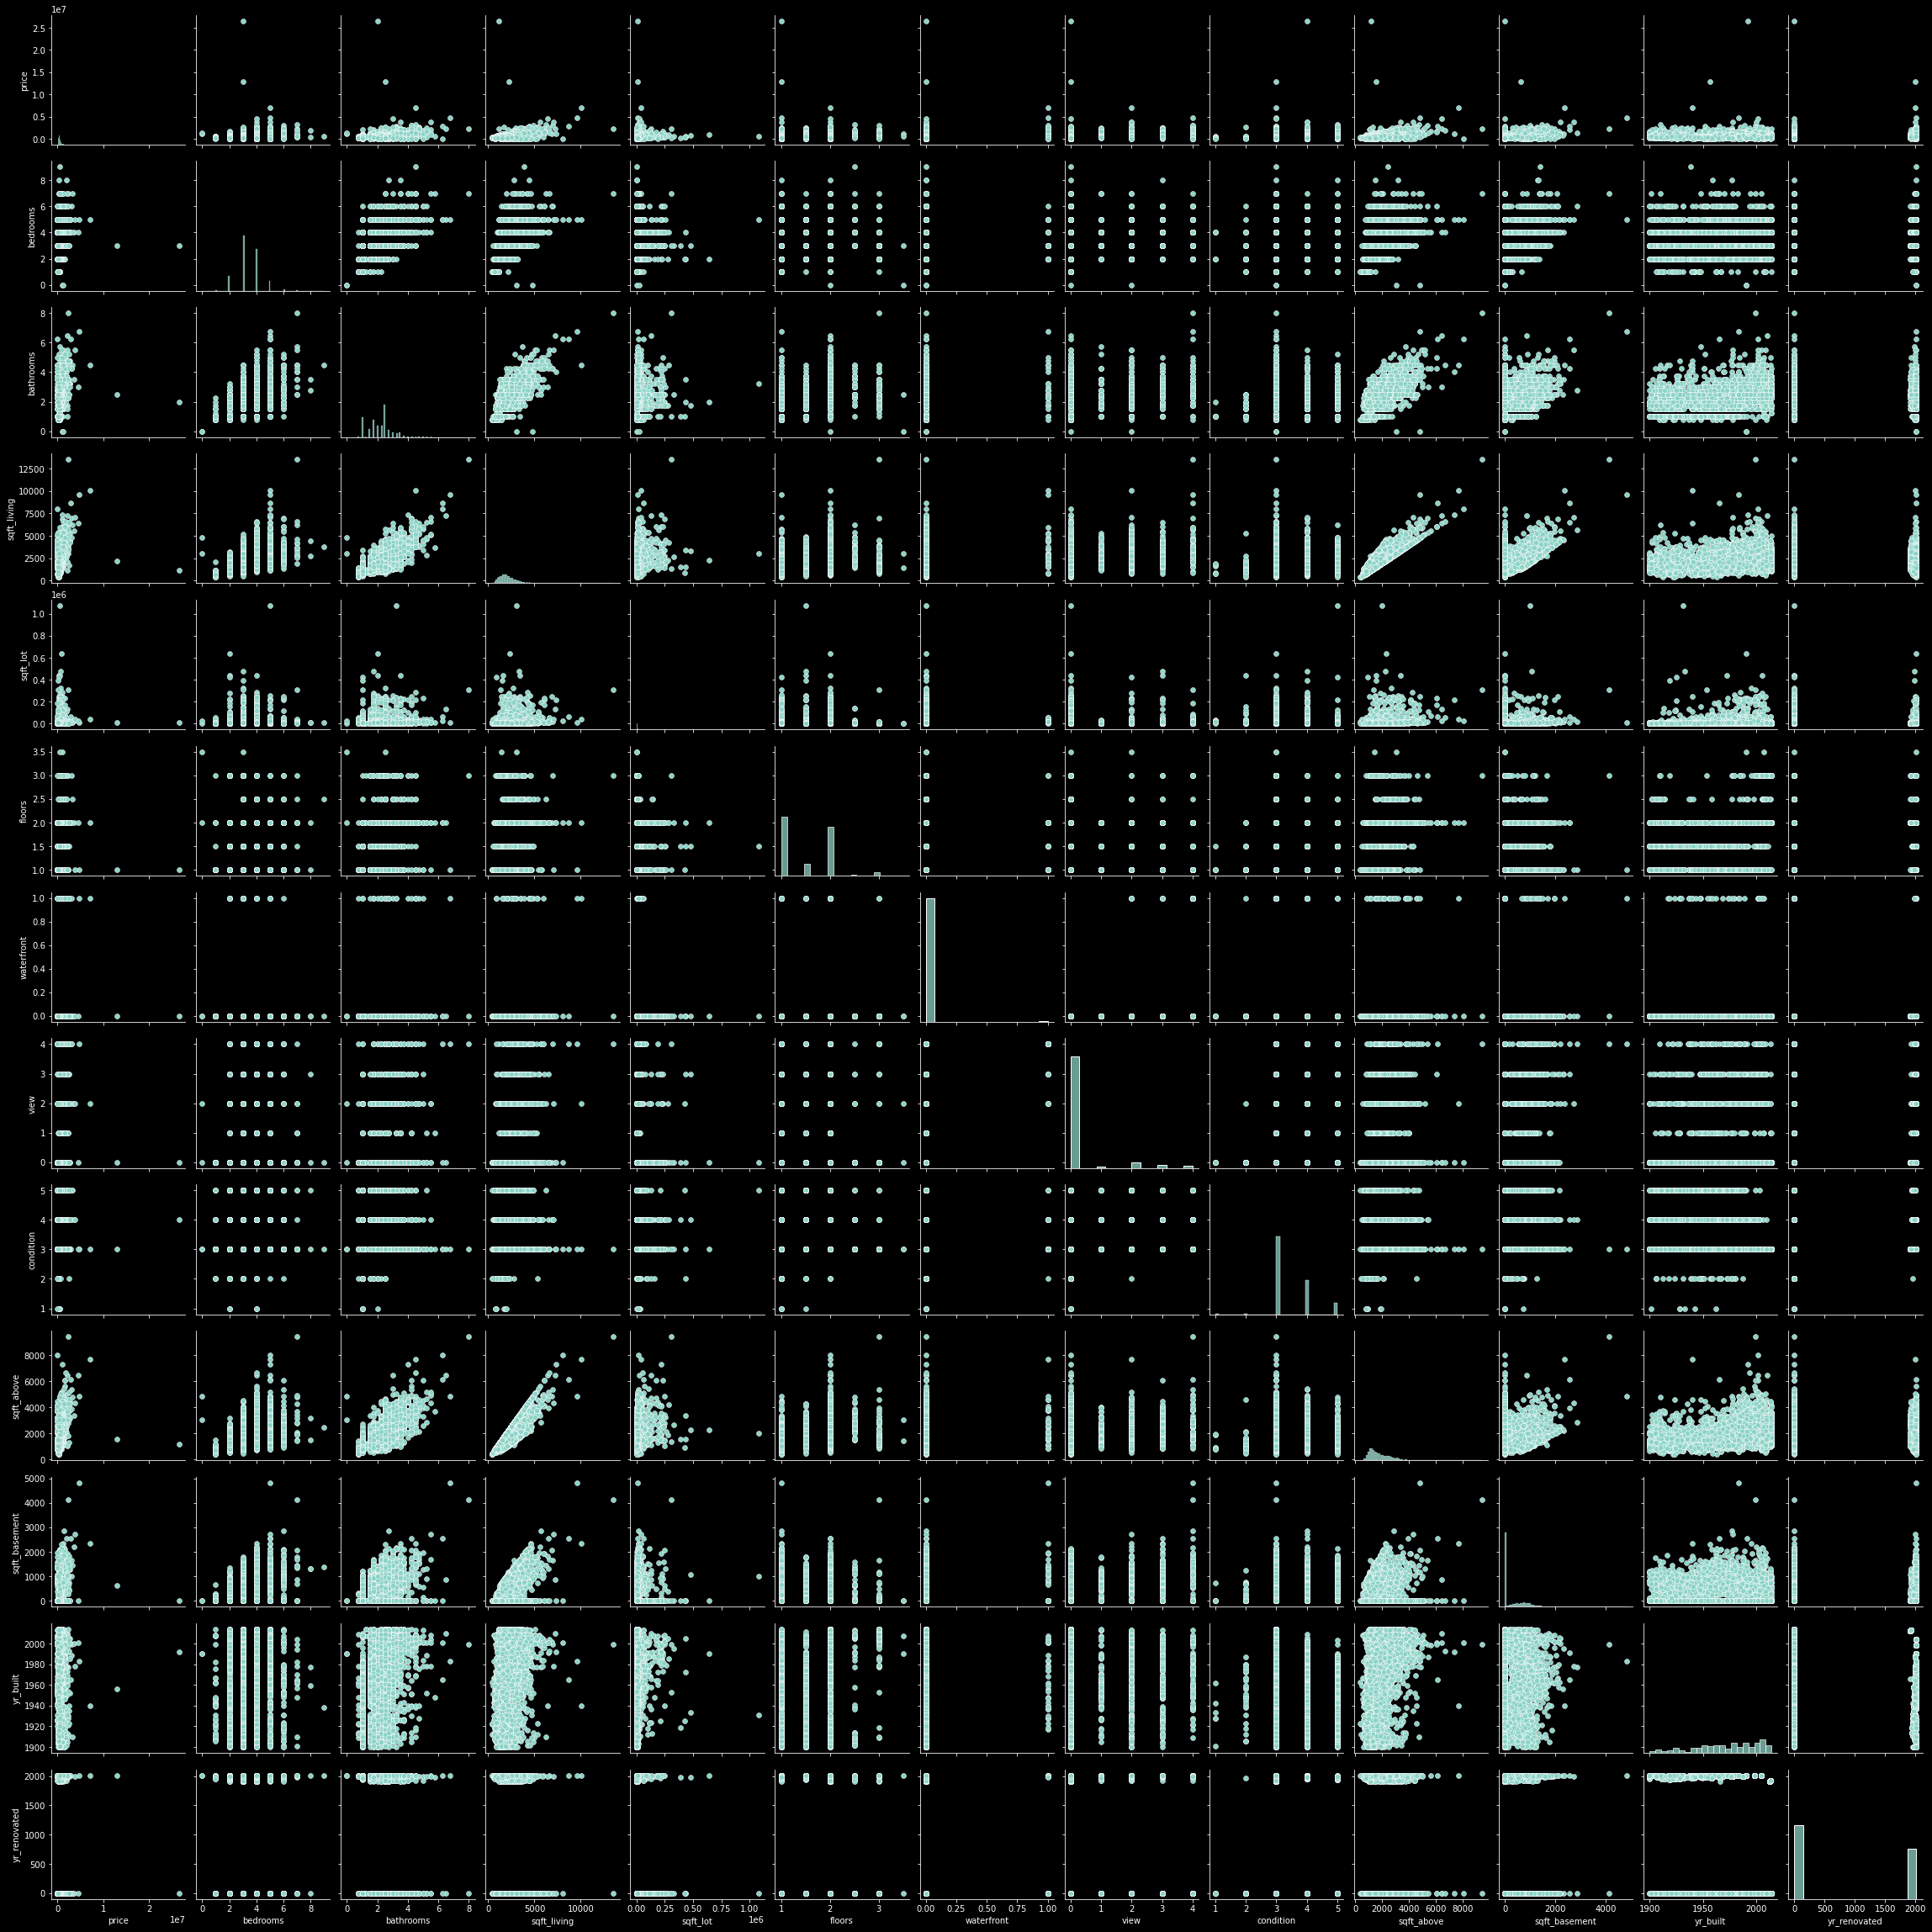

In [9]:
sns.pairplot(dataset)

Here, we don't see a direct linearity of features with our Target price. Although we can see that there are outliers. Outliers can either be a mistake or just variance. To address the outliers we have plenty of methods available. Here we will use z score.

But before that let's remove the features represent things that are rare or exception in some way and wouldn't be relevant to the home buyer.

In [10]:
from sklearn.feature_selection import mutual_info_regression

In [11]:
def make_mi_score(x,y):
    x = x.copy()
    for colname in x.select_dtypes(['object','category']):
        x[colname], _ = x[colname].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [12]:
x = dataset.copy()
y = x.pop('price')

mi_score = make_mi_score(x,y)
mi_score

street           1.149118
statezip         0.457778
city             0.310472
sqft_living      0.298258
sqft_above       0.200071
bathrooms        0.193590
sqft_lot         0.144439
bedrooms         0.076253
yr_built         0.075571
floors           0.071026
view             0.052216
sqft_basement    0.044597
yr_renovated     0.018178
condition        0.006858
waterfront       0.005099
date             0.004385
country          0.000000
Name: Mutual Information Score, dtype: float64

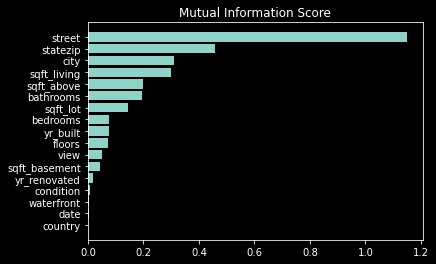

In [13]:
def plot_mi_score(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')

plot_mi_score(mi_score)

In [14]:
# refining the dataset based on mutual information score 
dataset = dataset[['street','statezip','city','sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]

In [15]:
dataset

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,1955,7912,3.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,1921,9050,5.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,1966,11947,3.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,1963,8030,3.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,1976,10500,4.0
...,...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,1954,6360,3.0
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,1983,7573,3.0
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,2009,7014,3.0
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,1974,6630,4.0


In [16]:
dataset=dataset.join(y)

<a class="anchor" id="chapter4"></a>

#   <font color='blue'> 4. Removing Outliers with Z-score  </font>

While calculating the z-score we rescale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be trated as the outliers.

In most of the cases a threshold of 3 or -3 is used. If the Z-score value is greater than or less than 3 or -3 respectively, that data points will be defines as outliers.

In [17]:
from scipy import stats

z = np.abs(stats.zscore(dataset[['sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]))
print(z)

      sqft_living  sqft_above  bathrooms  yr_built  sqft_lot  bedrooms
0        0.829971    0.565224   0.843204  0.531014  0.193434  0.441122
1        1.568528    1.789559   0.432802  1.674693  0.161718  1.759705
2        0.217367    0.119171   0.205201  0.161000  0.080978  0.441122
3        0.144686    0.959621   0.113800  0.261913  0.190145  0.441122
4        0.206984    0.797222   0.432802  0.175376  0.121306  0.659291
...           ...         ...        ...       ...       ...       ...
4595     0.653458    0.368025   0.524202  0.564651  0.236689  0.441122
4596     0.705374    0.426025   0.432802  0.410840  0.202882  0.441122
4597     0.904009    1.371962   0.432802  1.285418  0.218462  0.441122
4598     0.051238    0.878421   0.205201  0.108101  0.229164  0.659291
4599     0.674224    0.391225   0.432802  0.646303  0.188139  0.441122

[4600 rows x 6 columns]


Let's try and define a threshold to identify an outlier.

In [18]:
threshold = 3
print(np.where(z>3))

(array([  56,  107,  122,  122,  122,  122,  122,  217,  227,  233,  240,
        241,  252,  252,  252,  254,  272,  291,  291,  375,  418,  418,
        452,  461,  462,  462,  462,  462,  471,  479,  484,  495,  548,
        575,  581,  581,  634,  634,  634,  675,  679,  743,  747,  779,
        798,  839,  847,  878,  879,  999, 1017, 1031, 1078, 1089, 1103,
       1128, 1130, 1132, 1132, 1182, 1182, 1209, 1209, 1209, 1261, 1265,
       1272, 1275, 1275, 1301, 1302, 1302, 1360, 1390, 1406, 1408, 1411,
       1417, 1417, 1424, 1455, 1479, 1500, 1539, 1567, 1567, 1571, 1602,
       1637, 1644, 1722, 1762, 1786, 1944, 1952, 1952, 1962, 1962, 2005,
       2005, 2152, 2155, 2157, 2199, 2226, 2279, 2286, 2286, 2300, 2316,
       2328, 2328, 2328, 2365, 2401, 2480, 2551, 2588, 2654, 2654, 2654,
       2717, 2725, 2731, 2731, 2731, 2731, 2761, 2761, 2846, 2846, 2855,
       2872, 2889, 2917, 2967, 2967, 2967, 2968, 2980, 2980, 3004, 3004,
       3004, 3004, 3046, 3056, 3099, 3117, 3122, 3

The first array contains the list of row numbers and the second array respective column numbers, which have Z-score higher than 3.

Let's remove the outliers and get the clean data!

In [19]:
new_dataset = dataset[(z<3).all(axis=1)]

In [20]:
new_dataset.shape # 273 (4600-4327) outliers removed

(4435, 10)

In [21]:
new_dataset.head(2)

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.5,1955,7912,3.0,313000.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.5,1921,9050,5.0,2384000.0


<a class="anchor" id="chapter5"></a>

#    <font color='blue'> 5. Training and Testing the dataset  </font>

In [22]:
x = new_dataset.copy()
y = x.pop('price')

<a class="anchor" id="chapter6"></a>

# <font color='blue'> 6. Target Encoding  </font>

We saw in our mutual information score that street, city and zipcodes do affect the pricing of house. And which makes sense from a buyer's perspective as well. Houses belong to an urban area have higher prices compare to the areas which are far from city.



So to drive this point home, we should not neglect that features. What we can do is, with the help of target encoding we will encode these fetures.


In [23]:
from category_encoders import MEstimateEncoder

In [24]:
encoder = MEstimateEncoder(cols=['street','statezip','city'],m=0.5)
encoder.fit(x,y)
x_transformed = encoder.transform(x)

In [25]:
x_transformed

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms
0,3.859344e+05,375656.132823,421503.366508,1340,1340,1.50,1955,7912,3.0
1,1.766601e+06,849969.156900,570200.891592,3650,3370,2.50,1921,9050,5.0
2,4.052677e+05,321296.502254,439062.351650,1930,1930,2.00,1966,11947,3.0
3,4.572677e+05,605283.972110,794664.954324,2000,1000,2.25,1963,8030,3.0
4,5.439344e+05,637165.488812,641698.401317,1940,1140,2.50,1976,10500,4.0
...,...,...,...,...,...,...,...,...,...
4595,3.827122e+05,375656.132823,570200.891592,1510,1510,1.75,1954,6360,3.0
4596,5.334900e+05,628361.946825,794664.954324,1460,1460,2.50,1983,7573,3.0
4597,4.552039e+05,495712.205322,371025.148520,3010,3010,2.50,2009,7014,3.0
4598,3.128677e+05,266618.424972,570200.891592,2090,1070,2.00,1974,6630,4.0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transformed.values,y.values,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[430000.        , 430269.26997451],
       [700000.        , 699453.01842046],
       [695000.        , 746717.99872996],
       ...,
       [450000.        , 450944.6053285 ],
       [217500.        , 218007.61352195],
       [330000.        , 331767.97961047]])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2952.2238169060406
457706403.5597009
0.9947499075331588


Our r2_score is telling that the Linear model is the best fit for our dataset!!


In [34]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(regressor,x_train,y_train,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cvs.std()*100))


Accuracy: 99.81 %
Standard Deviation: 0.25 %


Here, the standard deviation is very low which is a good sign.

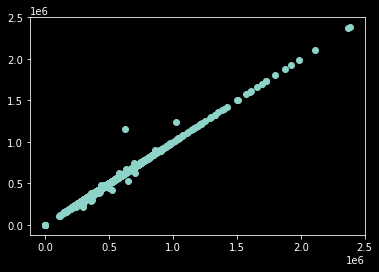

In [35]:
plt.scatter(y_test,y_pred)